In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data= pd.read_csv('matches - matches.csv')
data2= pd.read_csv('deliveries.csv')

In [3]:
data.head()


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
data.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3
count,636.000000,636.000000,636.000000,636.000000,636.000000,0.0
mean,318.500000,2012.490566,0.025157,13.682390,3.372642,NaN
std,183.741666,2.773026,0.156726,23.908877,3.420338,NaN
min,1.000000,2008.000000,0.000000,0.000000,0.000000,NaN
25%,159.750000,2010.000000,0.000000,0.000000,0.000000,NaN
50%,318.500000,2012.000000,0.000000,0.000000,4.000000,NaN
75%,477.250000,2015.000000,0.000000,20.000000,7.000000,NaN
max,636.000000,2017.000000,1.000000,146.000000,10.000000,NaN


In [5]:
data['winner']

0              Sunrisers Hyderabad
1           Rising Pune Supergiant
2            Kolkata Knight Riders
3                  Kings XI Punjab
4      Royal Challengers Bangalore
                  ...             
631    Royal Challengers Bangalore
632    Royal Challengers Bangalore
633            Sunrisers Hyderabad
634            Sunrisers Hyderabad
635            Sunrisers Hyderabad
Name: winner, Length: 636, dtype: object

In [6]:
data[['team1','team2','winner']].head()

,team1,team2,winner
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad
1,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant
2,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders
3,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab
4,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore


In [7]:
data.iloc[1:9:2]
data.iloc[:,[4,5,10]]

,team1,team2,winner
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad
1,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant
2,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders
3,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab
4,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore
...,...,...,...
631,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore
632,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore
633,Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad
634,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad


In [8]:
#matches only held in Hyderabad City
mask=data['city']=='Hyderabad'
data[mask].shape[0]

49

In [9]:
# function to get number of matches in different city
def get_city_match_count(city):
    mask=data['city']==city
    return data[mask].shape[0]


In [10]:
get_city_match_count('Indore')

5

In [12]:
mask1=data['city']=='Hyderabad'
mask2=data['date']>'2017-01-01'
data[mask1 & mask2].shape[0]

8

Text(0, 0.5, 'No. of Matches')

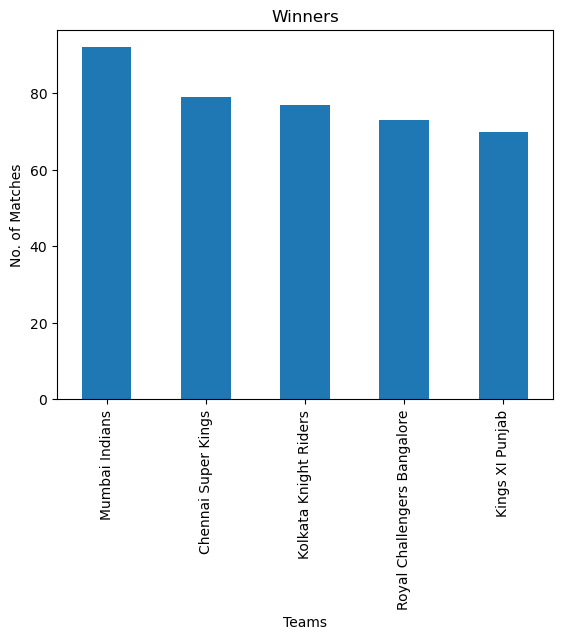

In [13]:
bargarph =data['winner'].value_counts().head()
bargarph.plot(kind='bar')
plt.title('Winners')
plt.xlabel('Teams')
plt.ylabel('No. of Matches')


Text(0.5, 1.0, 'Toss Decision ')

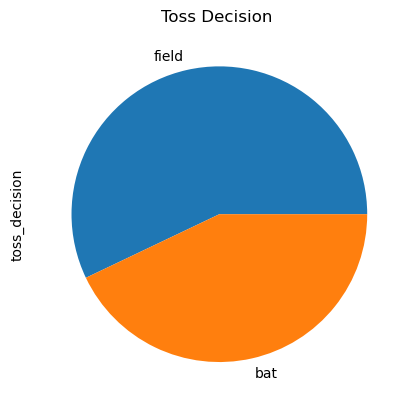

In [14]:
data['toss_decision'].value_counts().plot(kind='pie')
plt.title('Toss Decision ')


Text(0.5, 0, 'Runs')

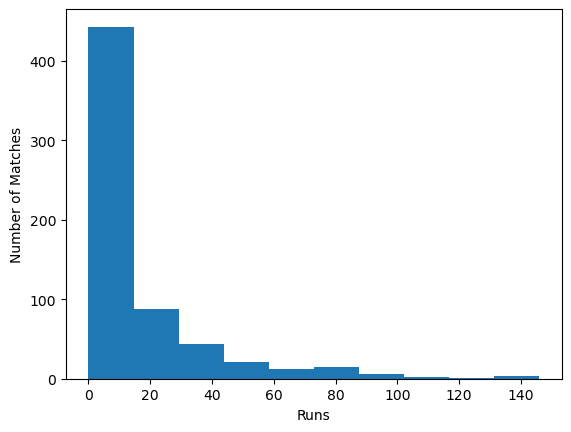

In [15]:
data['win_by_runs'].plot(kind='hist')
plt.ylabel('Number of Matches')
plt.xlabel('Runs')

Text(0, 0.5, '')

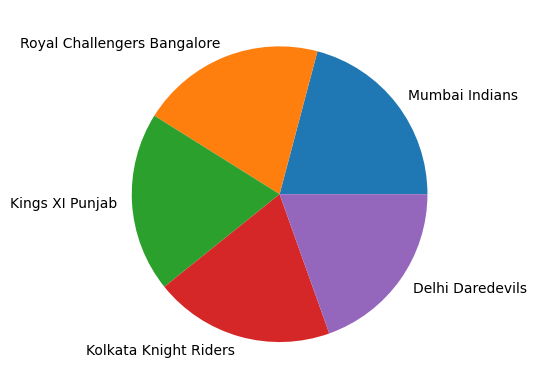

In [16]:
#total matches played by a team
totalMatchesByTeam=data['team1'].value_counts()+data['team2'].value_counts()
totalMatchesByTeam.sort_values(ascending=False).head().plot(kind='pie')
plt.ylabel('')

In [17]:
sortValuesByColumns=data.sort_values(['city','date'],ascending=[True,False])
sortValuesByColumns[['city','date']]

,city,date
475,Abu Dhabi,2014-04-29
470,Abu Dhabi,2014-04-26
471,Abu Dhabi,2014-04-26
464,Abu Dhabi,2014-04-21
459,Abu Dhabi,2014-04-18
...,...,...
468,NaN,2014-04-25
469,NaN,2014-04-25
466,NaN,2014-04-23
461,NaN,2014-04-19


In [18]:
#Number of Trophies won by Each Team
SeasonWinner=data.drop_duplicates('season',keep='last')[['season','winner']].sort_values('season',ascending=False)
SeasonWinner['winner'].value_counts()

Mumbai Indians           3
Kolkata Knight Riders    2
Chennai Super Kings      2
Sunrisers Hyderabad      1
Deccan Chargers          1
Rajasthan Royals         1
Name: winner, dtype: int64

Text(0, 0.5, 'Trophies Count')

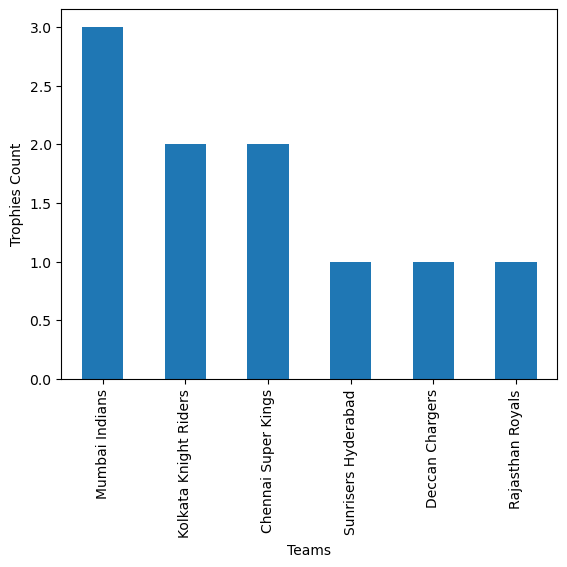

In [19]:
SeasonWinner['winner'].value_counts().plot(kind='bar')
plt.xlabel('Teams')
plt.ylabel('Trophies Count')

In [21]:
data2.head()


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [22]:
#Most runs socred by batsman

runs=data2.groupby('batsman')
runs['batsman']

In [23]:
runs['batsman_runs'].sum().sort_values(ascending=False).head()

batsman
SK Raina     4548
V Kohli      4423
RG Sharma    4207
G Gambhir    4132
DA Warner    4014
Name: batsman_runs, dtype: int64

In [24]:
# most six
def sixes():
    mask=data2['batsman_runs']==6;
    sixes_data= data2[mask]
    return sixes_data

In [25]:
sixes().shape

(6523, 21)

In [27]:
mostSixesBy_aBatsman = sixes().groupby('batsman')['batsman_runs'].count().sort_values(ascending=False)
mostSixesBy_aBatsman.head()

batsman
CH Gayle     266
SK Raina     174
RG Sharma    173
V Kohli      160
DA Warner    160
Name: batsman_runs, dtype: int64

In [29]:
mostSixesBy_aBatsman = sixes().groupby('batsman').size().sort_values(ascending=False)
mostSixesBy_aBatsman.head()

batsman
CH Gayle     266
SK Raina     174
RG Sharma    173
V Kohli      160
DA Warner    160
dtype: int64

In [30]:
# most runs by a batsman in 3 innings
def topRuns_inThreeInnings(name):
    batsmanName=data2['batsman']==name
    return data2[batsmanName].groupby('bowling_team')['batsman_runs'].sum().sort_values(ascending=False).head(3)

In [31]:
topRuns_inThreeInnings('MS Dhoni').rename_axis('Bowling Team')


Bowling Team
Royal Challengers Bangalore    608
Mumbai Indians                 581
Kings XI Punjab                453
Name: batsman_runs, dtype: int64

In [32]:
#strike rate in death overs
deathOvers=data2['over']>15

In [33]:
deathOverBatsman=data2[deathOvers].groupby('batsman')['batsman_runs'].count()
batsmanOver200Balls=deathOverBatsman>200
batsman_list=deathOverBatsman[batsmanOver200Balls].index.tolist()



In [34]:
deathOverBatsmanData= data2['batsman'].isin(batsman_list)

In [35]:
runs=data2[deathOverBatsmanData].groupby('batsman')['batsman_runs'].sum()

In [36]:
balls=data2[deathOverBatsmanData].groupby('batsman')['batsman_runs'].count()


In [37]:
strikeRate=(runs/balls)*100
strikeRate.head()

batsman
A Mishra           89.005236
AB de Villiers    145.129059
AD Mathews        120.868114
AM Rahane         117.486549
AR Patel          122.672065
Name: batsman_runs, dtype: float64

In [38]:
#merge dataFrames
mergeDataFrames=data2.merge(data,left_on='match_id',right_on='id')

In [39]:
mergeDataSet=mergeDataFrames.groupby(['season','batsman'])['batsman_runs'].sum().reset_index()

In [40]:
#orange cap
def orangeCap(season):
    seasonData=mergeDataSet['season']==season;
    return mergeDataSet[seasonData].groupby(['season','batsman'])['batsman_runs'].sum().sort_values(ascending=False).head(1)

In [41]:
orangeCap(2008)

season  batsman 
2008    SE Marsh    616
Name: batsman_runs, dtype: int64

In [42]:
mergeDataSet1=mergeDataFrames.groupby(['season','batsman'])['batsman_runs'].sum().sort_values(ascending=False).reset_index().drop_duplicates(subset='season',keep='first').sort_values('season',ascending=False)[['season','batsman']]
mergeDataSet1

,season,batsman
7,2017,DA Warner
0,2016,V Kohli
17,2015,DA Warner
6,2014,RV Uthappa
2,2013,MEK Hussey
3,2012,CH Gayle
11,2011,CH Gayle
9,2010,SR Tendulkar
14,2009,ML Hayden
10,2008,SE Marsh


In [43]:
sixTable=sixes().pivot_table(index='over',columns='batting_team',values='batsman_runs',aggfunc='count')

In [44]:
import seaborn as sns

<AxesSubplot:xlabel='batting_team', ylabel='over'>

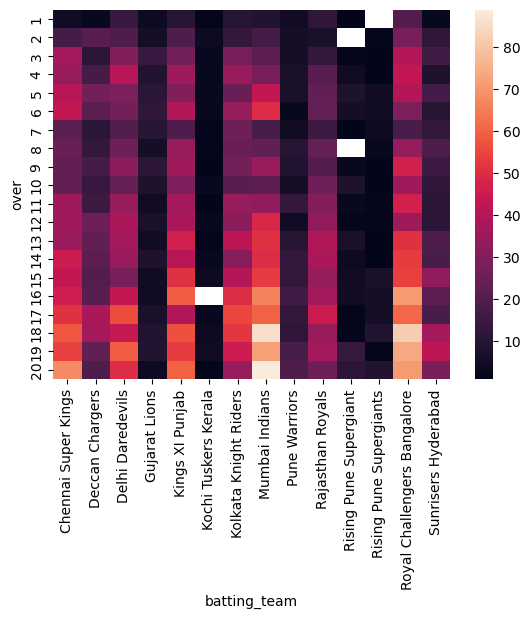

In [45]:
sns.heatmap(sixTable)

<AxesSubplot:>

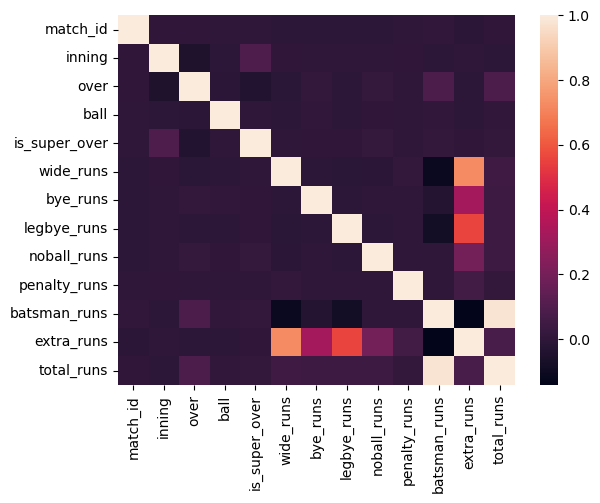

In [46]:
 sns.heatmap(data2.corr(  ))